### 목표
- 학생들의 수학 성적을 예측하는 회귀 모델을 만들어보자!
- keras를 이용해 신경망을 구성하는 방법을 연습해보자!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드
# delimiter : csv파일에서 구분자를 설정해주는 명령
data = pd.read_csv("data/student-mat.csv", delimiter =';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
data.shape

(395, 33)

In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

- 문제, 정답 분리
- 학습, 평가 데이터 분리

In [5]:
X = data['studytime']   # 문제
y = data['G3']          # 정답

In [6]:
X.shape, y.shape

((395,), (395,))

In [7]:
!pip install sklearn

In [8]:
# 학습, 평가 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(296,)
(99,)
(296,)
(99,)


### 신경망 모델 만들기
- 1. 신경망 구조 설계
- 2. 신경망 학습/ 평가 방법 설정
- 3. 학습 및 학습과정 시각화
- 4. 모델 평가

In [10]:
# 1. 신경망 구조 설계
# Sequential : 신경망의 뼈대를 구축해주는 라이브러리
from tensorflow.keras import Sequential
# inputLayer : 신경망의 입력층을 생성해주는 라이브러리
# Dense : 신경망 층(뉴런들의 묶음)을 구성해주는 라이브러리 
from tensorflow.keras.layers import InputLayer, Dense

In [11]:
# 신경망 뼈대 생성
model = Sequential()

# 입력층 설정
# input_shape : 입력 데이터의 특성 형태를 설정(특성의 개수, )
model.add(InputLayer(input_shape=(1,)))

# 출력층 설정
# Dense : 신경망에서 하나의 층을 쌓아 뉴런들을 결집시켜주는 역할
# ()안의 숫자는 하나의 Dense에 생성해줄 총 뉴런의 개수
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 2. 신경망 학습 및 평가방법 설정
model.compile(loss='mse',      # 손실함수(비용함수) : MSE(성적을 구하는 회귀 문제)
                optimizer='SGD'  # 최적화함수 : 경사하강법의 방법 설정(SGD:확률적경사하강법)
               )

In [13]:
# 3. 학습
h = model.fit(X_train, y_train,
              epochs=100        # 학습 횟수 설정
             )

Epoch 1/100
10/10 [==============================] - 0s 402us/step - loss: 61.8754
Epoch 2/100
10/10 [==============================] - 0s 299us/step - loss: 30.7994
Epoch 3/100
10/10 [==============================] - 0s 299us/step - loss: 27.8521
Epoch 4/100
10/10 [==============================] - 0s 299us/step - loss: 27.2706
Epoch 5/100
10/10 [==============================] - 0s 299us/step - loss: 26.9509
Epoch 6/100
10/10 [==============================] - 0s 399us/step - loss: 26.6285
Epoch 7/100
10/10 [==============================] - 0s 299us/step - loss: 26.2762
Epoch 8/100
10/10 [==============================] - 0s 299us/step - loss: 25.9618
Epoch 9/100
10/10 [==============================] - 0s 299us/step - loss: 25.7200
Epoch 10/100
10/10 [==============================] - 0s 299us/step - loss: 25.3945
Epoch 11/100
10/10 [==============================] - 0s 299us/step - loss: 25.1998
Epoch 12/100
10/10 [==============================] - 0s 399us/step - loss: 24.9311
E

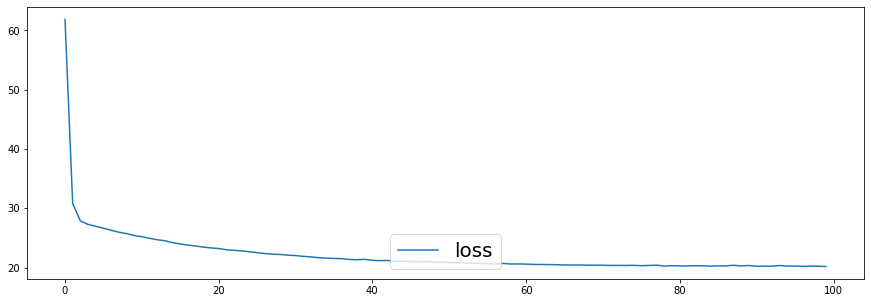

In [14]:
# 시각화
plt.figure(figsize=(15,5))

# history : 학습시 출력되는 loss함수 혹은 정확도값을 가져오기 위한 명령
plt.plot(h.history['loss'], label='loss')    

plt.legend(prop={'size':20}, loc='lower center')
plt.show()

- 초반에는 빠르게 MSE(loss함수)가 떨어지고 있다.
- 경사하강법 초반에는 가중치(w), 절편(b)값이 임의의 값으로 설정되어 있기 때문에 MSE가 높았고 조금만 학습시키면 줄어드는 것을 볼 수 있다.

In [15]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 499us/step - loss: 23.0099


23.009925842285156

### 입력 특성이 2개인 모델을 직접 설계해보자!
- 문제(입력특성2개 : studytime, traveltime) - X1 변수에 담아서 활용
- 정답(G3) -  y1 변수에 담아서 활용
- 최종 출력층 뉴런 개수는 1개

In [16]:
# 1. 문제, 정답 데이터 분리
# 2. 학습, 평가 데이터 분리
# 3. 신경망 구성

In [17]:
X1 = data[['studytime','traveltime']]  # 문제
y1 = data['G3']          # 정답

In [18]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=5)

In [19]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(296, 2)
(99, 2)
(296,)
(99,)


In [20]:
# 신경망 뼈대 생성
model1 = Sequential()

# 입력층 설정
# input_shape : 입력 데이터의 특성 형태를 설정(특성의 개수, )
model1.add(InputLayer(input_shape=(2,)))

# 출력층 설정
# Dense : 신경망에서 하나의 층을 쌓아 뉴런들을 결집시켜주는 역할
# ()안의 숫자는 하나의 Dense에 생성해줄 총 뉴런의 개수
model1.add(Dense(1))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [23]:
model1.compile(loss='mse',
               optimizer='SGD'
              )

In [25]:
h1 = model1.fit(X1_train, y1_train,
                epochs=100
               )

Epoch 1/100
10/10 [==============================] - 0s 399us/step - loss: 46.2675
Epoch 2/100
10/10 [==============================] - 0s 299us/step - loss: 26.9582
Epoch 3/100
10/10 [==============================] - 0s 299us/step - loss: 26.4966
Epoch 4/100
10/10 [==============================] - 0s 299us/step - loss: 26.2795
Epoch 5/100
10/10 [==============================] - 0s 399us/step - loss: 26.2027
Epoch 6/100
10/10 [==============================] - 0s 299us/step - loss: 25.9674
Epoch 7/100
10/10 [==============================] - 0s 399us/step - loss: 25.8878
Epoch 8/100
10/10 [==============================] - 0s 299us/step - loss: 25.5982
Epoch 9/100
10/10 [==============================] - 0s 399us/step - loss: 25.7090
Epoch 10/100
10/10 [==============================] - 0s 299us/step - loss: 25.3783
Epoch 11/100
10/10 [==============================] - 0s 299us/step - loss: 25.2934
Epoch 12/100
10/10 [==============================] - 0s 399us/step - loss: 25.0291
E

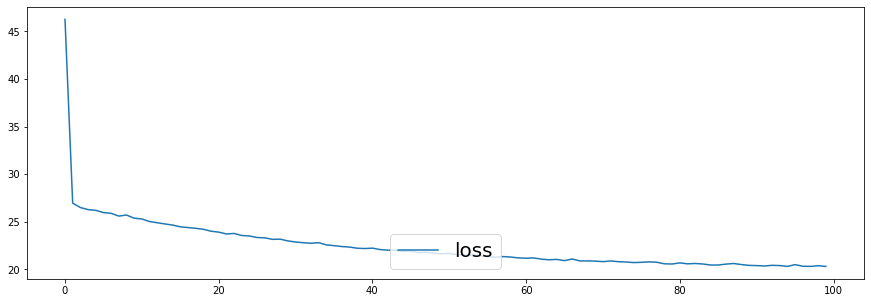

In [26]:
# 시각화
plt.figure(figsize=(15,5))

# history : 학습시 출력되는 loss함수 혹은 정확도값을 가져오기 위한 명령
plt.plot(h1.history['loss'], label='loss')    

plt.legend(prop={'size':20}, loc='lower center')
plt.show()

In [27]:
model1.evaluate(X1_test, y1_test)

4/4 [==============================] - 0s 499us/step - loss: 23.5313


23.531301498413086